# Pre-Experiment
Define All Variables to Run the Experiment
    <p>```setup.bash``` Exports the Variables to a ```setup.conf``` and sends it to the server</p>

In [1]:
username=yousifd # Username of user on server
exp_name=dsef # Name of Experiment on TestBed
proj_name=cops # Name of Project on TestBed
default_node=node-0 # Default node to run the experiment from
ds=cops2
host_ip=users.emulab.net
host_servers_ip=emulab.net
default_ip=${default_node}.${exp_name}.${proj_name}.${host_servers_ip}

# Setup Number of Servers and Clients
nservers=2 # Number of Servers and Clients
ndcs=2 # Number of Data Centers
eindex=0
ipprefix="node-"
ippostfix=""
threads=1
replication_factor=$ndcs

# Initialize Consistent Variables
trial=1 # Number of Trials in the Experiment
nkeys=10000 # Number of keys for the Experiment
run_time=60 # Time to run the Expierment
trim=5 # Trimmed time from the gathered results

# Initialize Default Variables
value_size=128 # Size of the Value Read and/or Written
cols_per_key_read=5 # Columns per key read
cols_per_key_write=5 # Columns per key write
keys_per_read=5 # Keys per read
keys_per_write=5 # Keys per write
write_frac="0.1" # Fraction of Write Operations to Read Operations
write_trans_frac="0.5" # Fraction of Write Transcation to Read Transactions

# Specify the Experiment's Indepdent Variable and its Values
exp=keys_per_read # Name of the Experiment
indep_values="1:${nkeys}" # Independen Variables to be Experimented with

insert_cmd=INSERTCL
KILLALL_SSH_TIME=90
MAX_ATTEMPTS=10

alias emulab="ssh ${username}@${host_ip} -o StrictHostKeyChecking=no"
alias server="ssh ${username}@${host_ip} -o StrictHostKeyChecking=no ssh ${default_ip} -t -t -o StrictHostKeyChecking=no"

source /home/yousifd/setup.bash

setup.conf
            420 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=0/1)
dynamic_common
          6,539 100%    5.57MB/s    0:00:00 (xfr#1, to-chk=0/1)
kodiak_dc_launcher.bash
          4,849 100%    3.96MB/s    0:00:00 (xfr#1, to-chk=0/1)


# Experiment
Launch Instances of the Distributed System
    
Setup Benchmark on Clients
    
Start the Experiment
    
Kill all Instances of the Distributed System

In [2]:
#emulab "/usr/testbed/bin/node_reboot -w -e cops,dsef"

server <<- 'EOF'

source dynamic_common

nserverstotal=$((ndcs*nservers))

killall java &

init

for t in $(seq $trial); do
for i in $(seq 0 $((${#var[@]} - 1))); do

    kill_all_ds
        
    setup

    launch
    
    set_server_keyspace
    
    set_client_keyspace
        
    for (( j = 1; j<=$((nserverstotal)); j++)); do
        ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}" &
    done
    
    run_experiment
    
    kill_all_ds
    
    gather_results
    
    for (( j = 1; j<=$((nserverstotal)); j++)); do
        rsync --remove-source-files -az node-${j}:/tmp/${ds}* ${output_dir}
    done
    
done; done; exit; exit;
EOF

rm -rf latest

rsync -az --copy-links ${username}@${host_ip}:/users/${username}/${ds}/experiments/dynamic_${exp}/latest /home/$USER

cd /home/$USER/latest
mkdir data
for i in $(ls *.gz); do
    mv ${i} ./data/
    gunzip ./data/${i}
done


source dynamic_common

nserverstotal=$((ndcs*nservers))

killall java &

init

for t in $(seq $trial); do
for i in $(seq 0 $((${#var[@]} - 1))); do

    kill_all_ds
        
    setup

    launch
    
    set_server_keyspace
    
    set_client_keyspace
        
    for (( j = 1; j<=$((nserverstotal)); j++)); do
        ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}" &
    done
    
    run_experiment
    
    kill_all_ds
    
    gather_results
    
    for (( j = 1; j<=$((nserverstotal)); j++)); do
        rsync --remove-source-files -az node-${j}:/tmp/${ds}* ${output_dir}
    done
    
done; done; exit; exit;
Welcome to Ubuntu 16.04.1 LTS (GNU/Linux 4.4.0-45-generic x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage
Last login: Thu May 25 14:23:52 2017 from 155.98.33.74
yousifd@node-0:~$ 
yousifd@node-0:~$ source dynamic_common
yousi

node-3: 1204,46,66,330,34440,0.02410869565217391,28
node-4: 9226,496,708,3540,443520,0.001411290322580645,28
node-3: 1259,55,67,335,29680,0.01878181818181818,29
node-4: 9913,687,935,4675,585200,0.0013318777292576419,29
node-3: 1303,44,48,240,15120,0.024977272727272726,30
node-4: 10517,604,812,4060,507680,0.0012996688741721855,30
node-3: 1340,37,61,305,30640,0.02837837837837838,31
node-4: 11183,666,962,4810,604880,0.0012282282282282282,31
node-3: 1374,34,54,270,27360,0.03161764705882353,33
node-4: 11900,717,981,4905,609240,0.0011617852161785215,33
node-3: 1406,32,36,180,16440,0.03378125,34
node-4: 12637,737,1017,5085,634680,0.0011221166892808683,34
node-3: 1437,31,43,215,20920,0.02825806451612903,35
node-4: 13679,1042,1370,6850,858200,4.1746641074856045E-4,35
node-3: 1445,8,8,40,3320,0.068375,36
node-4: 14647,968,1412,7060,894680,4.824380165289256E-4,36
node-3: 1447,2,6,30,3240,0.8185,37
node-4: 15354,707,963,4815,606720,0.001099009900990099,37
node-3: 1495,48,60,300,23400,0.02704166666

# Data Gathering and Post Processing
Gather Data from Servers and Clients
    
Post Process the Data into Meaningful Chunks
    
Generate Graphs from the Data Chuncks

In [3]:
output_dir=/home/$USER/latest

source setup.conf

cd /home/$USER/postprocess
./dynamic_postprocess_full.bash ${output_dir} ${output_dir} ${run_time} ${trim} shuffle; exit; exit;

bash: setup.conf: No such file or directory
client0
  cops2/
    trial1/
/home/yousifd/latest/data/
/home/yousifd/latest/trial1/
 cops2
  Client Postprocess: complete     
  Combining Clients: complete      1_5_0.1_0.5_60+1+tput      
/home/yousifd/latest/cops2.graph
1	815	1140	5703	722640
exit
Restarting Bash

# Graphing with GNUPlot

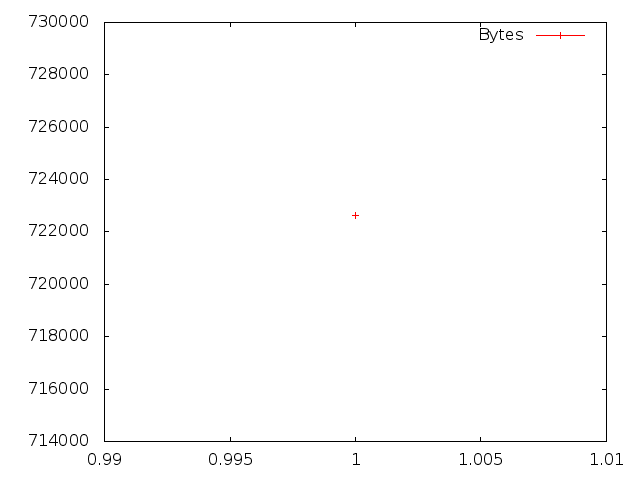

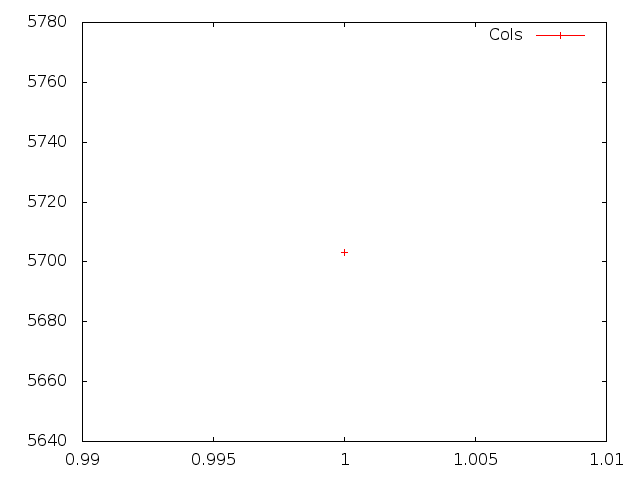

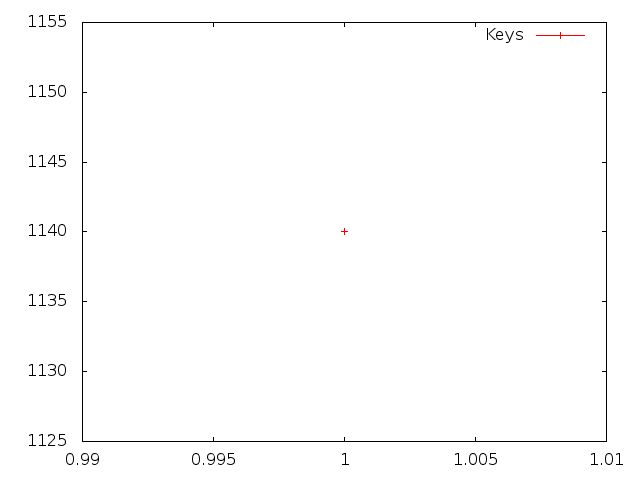

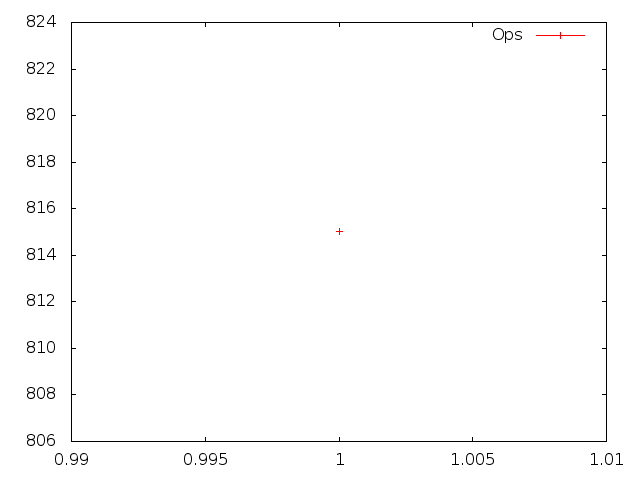

In [4]:
cd /home/yousifd/latest

source /home/yousifd/setup.conf
export ds

gnuplot <<- 'EOF'

    ds=system("echo ${ds}")
    
    set term png

    set output "bytes.png"
    plot ds.".graph" using 1:5 with linespoint title 'Bytes'

    set output "cols.png"
    plot ds.".graph" using 1:4 with linespoint title 'Cols'

    set output "keys.png"
    plot ds.".graph" using 1:3 with linespoint title 'Keys'

    set output "ops.png"
    plot ds.".graph" using 1:2 with linespoint title 'Ops'

EOF

display < bytes.png
display < cols.png
display < keys.png
display < ops.png

rm *.png